In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski, Crippen
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_logp(child_logps, parent_logps, logp_diff):
    # Define the range and bin width
    x_range = (-5, 13)
    bin_width = 0.4  # Define a desired bin width
    
    # Calculate the number of bins
    bins = np.arange(x_range[0], x_range[1] + bin_width, bin_width)

    # Plot histograms for metabolite and parent weights side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(parent_logps, bins=bins, color='darkorange')
    axes[0].set_title('Parent LogP')
    axes[0].set_xlabel('LogP')
    axes[0].set_ylabel('Frequency')
    #axes[0].set_xlim(0, 1200)
    axes[0].set_ylim(0, 450)

    axes[1].hist(child_logps, bins=bins, color='orange')
    axes[1].set_title('Child LogP')
    axes[1].set_xlabel('LogP')
    axes[1].set_ylabel('Frequency')
    #axes[1].set_xlim(0, 1200)
    axes[1].set_ylim(0, 450)

    plt.tight_layout()
    plt.show()

    # Plot histogram for weight differences
    plt.figure(figsize=(6, 5))
    plt.hist(logp_diff, bins=bins, color='purple')
    plt.title('LogP Differences (Parent - Metabolite)')
    plt.xlabel('LogP')
    plt.ylabel('Frequency')
    plt.xlim(-3, 8)
    plt.show()


def logp_analysis(datafile): # input dataset needs columns 'parent_smiles' and 'child_smiles'
    dataset = pd.read_csv(datafile)

    child_logp_list, parent_logp_list, logp_diff_list = [], [], []

    parents = dataset["parent_smiles"]
    children = dataset["child_smiles"]

    for parent, child in zip(parents, children):

        parent = Chem.MolFromSmiles(parent)
        child = Chem.MolFromSmiles(child)

        child_logp = round(Crippen.MolLogP(child), 3)
        child_logp_list.append(child_logp)

        parent_logp = round(Crippen.MolLogP(parent), 3)
        parent_logp_list.append(parent_logp)

        diff = (parent_logp-child_logp)
        logp_diff_list.append (diff)

    return child_logp_list, parent_logp_list, logp_diff_list

In [2]:
datafile = '/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_clean.csv'
child_logps, parent_logps, logp_diff = logp_analysis(datafile)
print(min(parent_logps), max(parent_logps))
print(min(child_logps), max(child_logps))

-3.835 12.606
-4.794 8.918


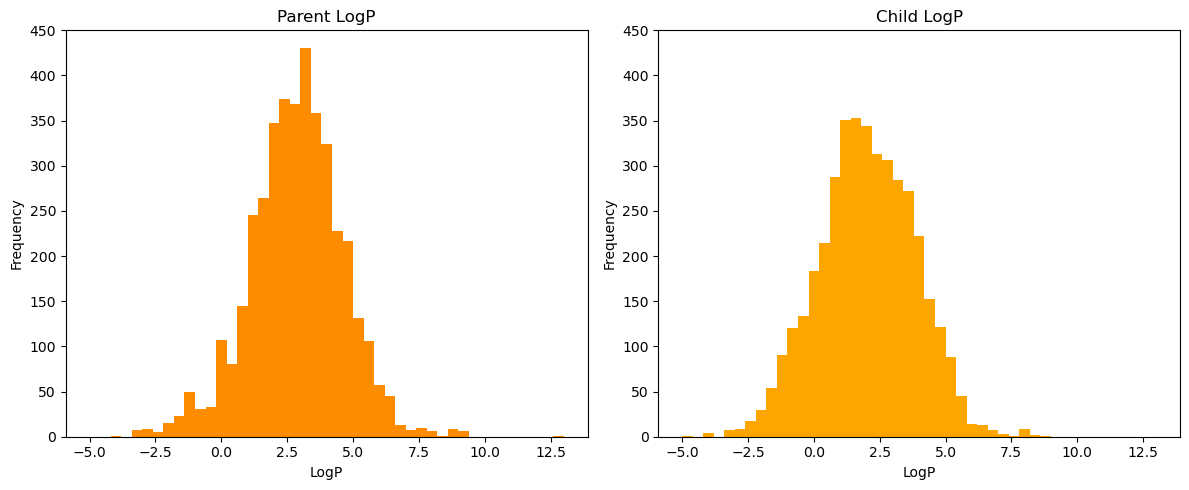

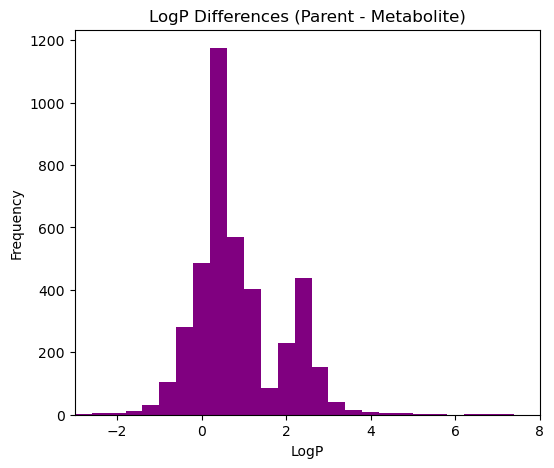

In [3]:
plot_logp(child_logps, parent_logps, logp_diff)